<a href="https://colab.research.google.com/github/e-saidha/Iris-flower-ML/blob/main/Iris_Flower_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


In [66]:
iris = datasets.load_iris()

In [67]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [68]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [69]:
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [71]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str[:-5]


In [72]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      sp
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [73]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape


(149, 5)

In [76]:
df['sp'].value_counts()

sp
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

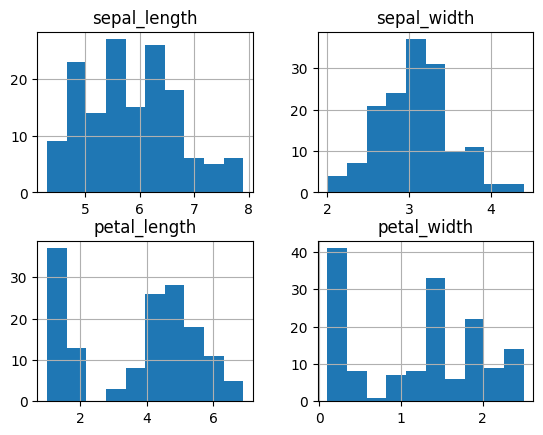

In [77]:
df.hist()

<Axes: xlabel='petal_width', ylabel='Count'>

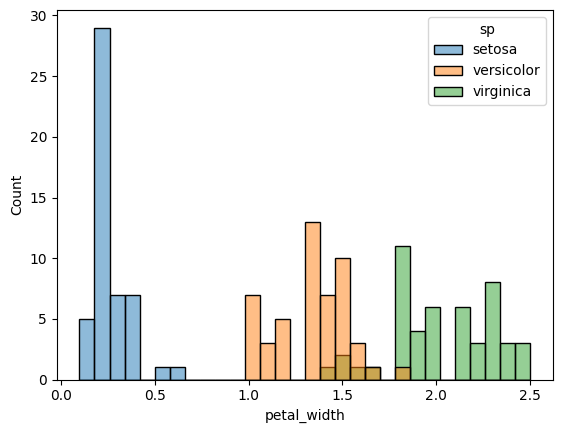

In [78]:
sns.histplot(bins =30,alpha = 0.5, data = df, hue = 'sp', x ='petal_width')

<Axes: xlabel='petal_length', ylabel='Density'>

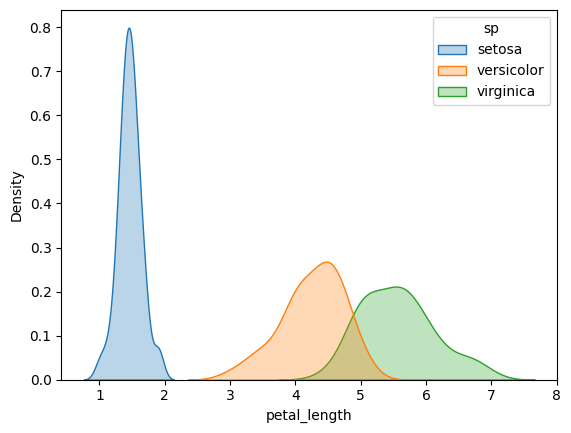

In [79]:
sns.kdeplot(data=df, x='petal_length', hue='sp', fill=True, alpha=0.3)

<Axes: xlabel='sp', ylabel='petal_length'>

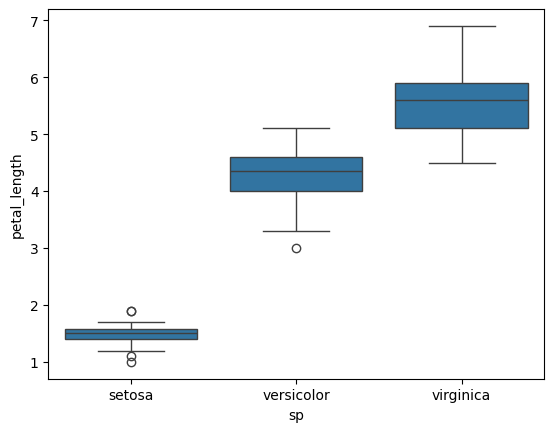

In [80]:
sns.boxplot(x = 'sp', y = 'petal_length', data =df)

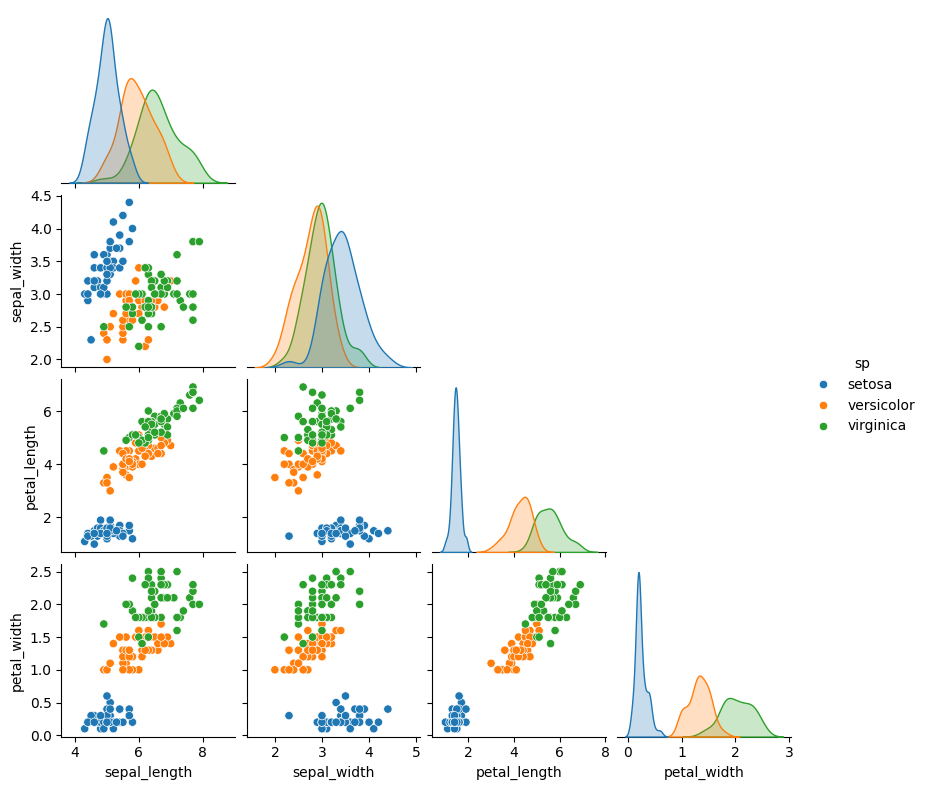

In [81]:
sns.pairplot(df,hue ='sp', height = 2, corner = True)

Logistic Regression

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df.drop('sp',axis=1)
y =df['sp']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state =42, stratify = y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (89, 4)
Test size: (60, 4)


In [83]:
model = LogisticRegression(max_iter =200)

In [84]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [98]:
y_pred = model.predict(X_test)

In [99]:
acc_lr = accuracy_score(y_pred,y_test)

In [100]:
print(confusion_matrix(y_pred,y_test))

[[20  0  0]
 [ 0 20  2]
 [ 0  0 18]]


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Random Forest


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=4, max_depth = 20, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred_rf)


In [97]:
print(rf_acc)

0.9166666666666666


In [91]:
print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred))

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))



--- Logistic Regression ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


--- Random Forest ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      0.95      0.88        20
   virginica       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



Text(0.5, 1.0, 'Logistic Regression vs Random Forest')

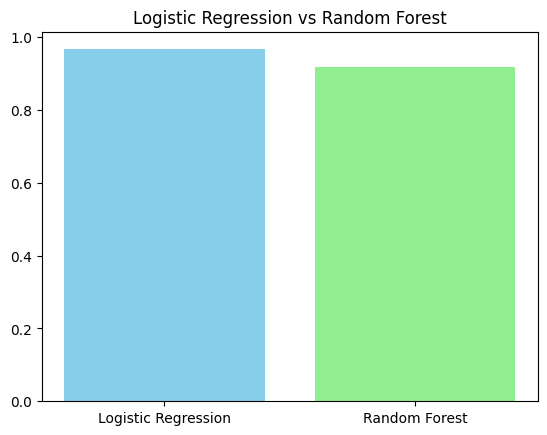

In [102]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [acc_lr, rf_acc]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Logistic Regression vs Random Forest')